##### - 독립변수 : 특성을 자유롭게 조합해 가면서 검증해보기
##### ...(특성을 자유롭게 조합하여 적용해 가면서 정확도 차이 확인)
##### ...(전체 특성을 모두 적용도 해보세요)
##### - 사용한 모델별로, 예측(predict)을 통한 결과를, 데이터프레임에 col_predict 컬럼명으로 추가하기
##### 가장 마지막! 가장 적합한 모델, 가장 적합한 독립변수 해설로 달기

In [31]:
# [문제] 5시 30분까지 [구글드라이브 > 산출물 > 02_분류(와인)] 제출
# 와인 데이터 사용
# 와인의 화학 조성을 사용하여 와인의 종류 예측 (자유롭게)

# ** 특성 이름을 담고 있는 key 값 = feature_names
# ** 특성 데이터를 담고 있는 key 값 = data
# ** 범주 와인의 종류를 담고 있는 key 값 = target_names
#   - 범주는 'class_0'과 'class_1'만 사용 (0과 1로 변경하여 사용)
#   - (0=레드와인, 1=화이트와인)

# 알콜(alcohol)
# 말산(malic_acid)
# 회분(ash)
# 회분의 알칼리도(alcalinity_of_ash)
# 마그네슘(magnesium)
# 총 폴리페놀(total_phenols)
# 플라보노이드 폴리페놀(flavanoids)
# 비 플라보노이드 폴리페놀(nonflavanoid_phenols)
# 프로안토시아닌(proanthocyanins)
# 색상의 강도(color_intensity)
# 색상(hue)
# 희석 와인의 0D280/0D315 비율 (od280/od315_of_diluted_wines)
# 프롤린 (proline)

from sklearn.datasets import load_wine

wine_all = load_wine()
wine_all

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

## 와인의 종류 예측 방법 4가지
### 1. K-최근접이웃(KNN, 이웃값 조정)
### 2. 로지스틱 회귀분류(이진분류)
### 3. 확률적 경사 하강법(SGD)
### 4. 결정트리

## 1. 데이터 준비

In [32]:
import pandas as pd
wine = pd.DataFrame(wine_all['data'], columns= wine_all['feature_names'])
wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [33]:
wine["target"] = wine_all["target"]

In [34]:
wine_data = pd.concat([wine[wine["target"] == 0], wine[wine["target"] == 1]]).reset_index(drop=True)
wine_data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,12.07,2.16,2.17,21.0,85.0,2.60,2.65,0.37,1.35,2.76,0.86,3.28,378.0,1
126,12.43,1.53,2.29,21.5,86.0,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352.0,1
127,11.79,2.13,2.78,28.5,92.0,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466.0,1
128,12.37,1.63,2.30,24.5,88.0,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342.0,1


In [35]:
# 결측치 확인하기
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       130 non-null    float64
 1   malic_acid                    130 non-null    float64
 2   ash                           130 non-null    float64
 3   alcalinity_of_ash             130 non-null    float64
 4   magnesium                     130 non-null    float64
 5   total_phenols                 130 non-null    float64
 6   flavanoids                    130 non-null    float64
 7   nonflavanoid_phenols          130 non-null    float64
 8   proanthocyanins               130 non-null    float64
 9   color_intensity               130 non-null    float64
 10  hue                           130 non-null    float64
 11  od280/od315_of_diluted_wines  130 non-null    float64
 12  proline                       130 non-null    float64
 13  targe

## 2. 데이터 전처리

In [36]:
wine_data.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

In [37]:
wine_data.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.021014,0.190818,-0.461771,0.330544,0.485061,0.543729,-0.301314,0.190869,0.741935,0.026162,0.290491,0.756168,-0.824399
malic_acid,0.021014,1.000000,0.121625,0.141753,-0.016360,0.030038,0.057852,0.055669,0.136454,-0.108202,-0.408645,0.166457,-0.107553,-0.044302
ash,0.190818,0.121625,1.000000,0.369136,0.306593,0.254490,0.377025,0.179396,0.077778,0.253347,0.041164,0.214496,0.304101,-0.354548
alcalinity_of_ash,-0.461771,0.141753,0.369136,1.000000,-0.123546,-0.228873,-0.180189,0.335042,-0.096965,-0.433335,-0.035805,-0.000632,-0.427021,0.470437
magnesium,0.330544,-0.016360,0.306593,-0.123546,1.000000,0.304089,0.255309,-0.212922,0.278018,0.345495,0.071684,0.130838,0.426982,-0.383085
total_phenols,0.485061,0.030038,0.254490,-0.228873,0.304089,1.000000,0.846509,-0.444721,0.444117,0.590428,-0.008302,0.494673,0.506179,-0.532692
flavanoids,0.543729,0.057852,0.377025,-0.180189,0.255309,0.846509,1.000000,-0.358804,0.542889,0.707064,-0.006622,0.537528,0.545781,-0.610730
nonflavanoid_phenols,-0.301314,0.055669,0.179396,0.335042,-0.212922,-0.444721,-0.358804,1.000000,-0.337243,-0.280354,0.051340,-0.468611,-0.330049,0.337489
proanthocyanins,0.190869,0.136454,0.077778,-0.096965,0.278018,0.444117,0.542889,-0.337243,1.000000,0.272754,-0.010739,0.342529,0.274927,-0.249205
color_intensity,0.741935,-0.108202,0.253347,-0.433335,0.345495,0.590428,0.707064,-0.280354,0.272754,1.000000,0.009784,0.208163,0.775315,-0.750613


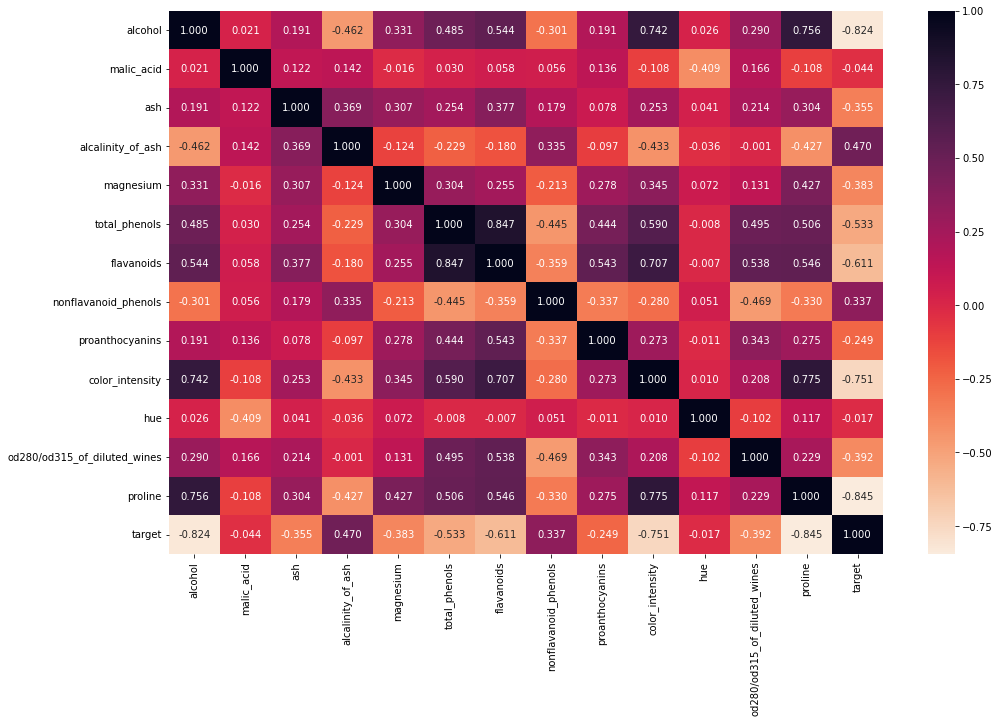

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (16,10))
sns.heatmap(wine_data.corr(), annot=True, fmt = '.3f', cmap='rocket_r')
plt.show()

In [85]:
wine_input = wine_data[['alcohol','color_intensity', 'proline']].to_numpy()
wine_target = wine_data["target"]

### 사용 패키지 불러들이기
from sklearn.model_selection import train_test_split

### 데이터 나누기
train_input, test_input, train_target, test_target = \
    train_test_split(wine_input, wine_target, random_state=42)
    
### 차원 확인하기
print("훈련-입력", train_input.shape)
print("훈련-타겟", train_target.shape)
print("테스트-입력", test_input.shape)
print("테스트-타겟", test_target.shape)

훈련-입력 (97, 3)
훈련-타겟 (97,)
테스트-입력 (33, 3)
테스트-타겟 (33,)


In [86]:
### 정규화(표준화) -> 독립변수 표준점수로 동일하게 표준화(스케일)
### 라이브러리 생성
from sklearn.preprocessing import StandardScaler

### 클래스(모델) 생성
ss = StandardScaler()

### 스스로 표준점수 생성
ss.fit(train_input)

### 훈련데이터를 표준점수로 변환하기
# - 타겟 데이터는 절대 변경하면 안됩니다.(정답입니다.)
train_scaled = ss.transform(train_input)
### 테스트데이터를 표준점수로 변환하기
test_scaled = ss.transform(test_input)

print(train_scaled)
print(test_scaled)

[[ 0.66604158 -0.36773071  0.24962922]
 [-0.61993372  0.3462824  -0.74664951]
 [-1.7124437  -0.63856327 -0.97267096]
 [-0.94996277 -1.46337151 -0.40464338]
 [ 0.81398564  1.95896717  1.63252358]
 [-1.22309027 -0.90324054 -0.77638918]
 [ 0.90502814 -0.19538272  0.81468283]
 [ 0.15392752  0.56787267  0.36858787]
 [-0.61993372  0.29704011 -0.24702316]
 [-1.25723121 -0.99556982 -0.40464338]
 [ 0.92778876  0.97412151  1.55817442]
 [ 0.85950689 -0.19538272 -0.38977355]
 [-1.18894933 -0.81091126 -1.13326514]
 [ 1.07573282  1.90972489  0.84442249]
 [ 0.9619297   0.78946295  1.4094761 ]
 [ 0.2222094   0.72791009 -0.77044125]
 [ 0.15392752 -0.330799    0.20501972]
 [-0.56303215 -1.26640238 -1.23735396]
 [ 1.08711314  0.23548726  0.45780686]
 [-0.61993372  0.23548726 -0.30055456]
 [-0.61993372 -1.22947067 -1.24627586]
 [ 0.97331001  1.34343863  1.82583139]
 [ 1.46266344  1.62042647  2.04887887]
 [ 0.48395658 -0.5831657  -0.03289759]
 [ 0.08564565 -0.47237056  0.66598451]
 [ 1.48542407  0.60480438

## 1. KNN

In [87]:
### K-최근접이웃분류 모델로 테스트

### 라이브러리 생성
from sklearn.neighbors import KNeighborsClassifier

### 클래스(모델) 생성
kn = KNeighborsClassifier(n_neighbors=3)

kn.fit(train_scaled, train_target)

### 훈련데이터 정확도
print("훈련 = ", kn.score(train_scaled, train_target))

### 테스트데이터 정확도
print("테스트 = ", kn.score(test_scaled, test_target))

### (해석)
# 과소적합 발생
# - 훈련모델을 복잡하게 만들어 평가결과를 높이는 방법 사용
# - 이웃의 갯수를 3으로 작게 하여 이웃의 비교대상을 압축시키고,
# - 훈련의 집중도와 정확도를 높임
# - 0.006정도의 훈련/테스트 데이터 정확도 차이를 보임

훈련 =  0.9690721649484536
테스트 =  0.9696969696969697


In [89]:
### 독립변수 특성 데이터만 추출
predict_data = wine_data[['alcohol','color_intensity', 'proline']].to_numpy()

predict_scaled = ss.transform(predict_data)

# 예측 데이터 결과 확인하기
result_predict = kn.predict(predict_scaled)

wine_pred = wine_data[['alcohol','color_intensity', 'proline']]

wine_pred["target"] = wine_data["target"]
wine_pred["col_predict"] = result_predict
wine_pred


C:\Users\admin\AppData\Local\Temp\ipykernel_6024\3262250326.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_pred["target"] = wine_data["target"]
C:\Users\admin\AppData\Local\Temp\ipykernel_6024\3262250326.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_pred["col_predict"] = result_predict


,alcohol,color_intensity,proline,target,col_predict
0,14.23,5.64,1065.0,0,0
1,13.20,4.38,1050.0,0,0
2,13.16,5.68,1185.0,0,0
3,14.37,7.80,1480.0,0,0
4,13.24,4.32,735.0,0,0
...,...,...,...,...,...
125,12.07,2.76,378.0,1,1
126,12.43,3.94,352.0,1,1
127,11.79,3.00,466.0,1,1
128,12.37,2.12,342.0,1,1


In [90]:

### 정답 갯수와 오답 갯수 확인하기
o_cnt = len(wine_pred[(wine_pred["target"] == wine_pred["col_predict"])])
o_cnt

x_cnt = len(wine_pred[(wine_pred["target"] != wine_pred["col_predict"])])
x_cnt

sum_cnt = len(wine_pred)
sum_cnt 

print("총 갯수[{}]건 중에, 정답갯수[{}]건, 오답 갯수[{}]건".format(sum_cnt, o_cnt, x_cnt))

### 정답률과 오답률 확인하기
import numpy as np

o_p = np.round(o_cnt / sum_cnt * 100, 2)
x_p = np.round(x_cnt / sum_cnt * 100, 2)
sum_p = o_p + x_p

print("총 {}% 중 정답률[{}%], 오답률[{}%]".format(sum_p, o_p, x_p))

총 갯수[130]건 중에, 정답갯수[126]건, 오답 갯수[4]건
총 100.0% 중 정답률[96.92%], 오답률[3.08%]


## 2. 로지스틱 회귀분류(이진분류)

In [91]:
### 이진분류 하기
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(train_scaled, train_target)

### 훈련데이터 정확도
print("훈련 = ", lr.score(train_scaled, train_target))
print("테스트 = ", lr.score(test_scaled, test_target))

### (해석)
# 과대적합 발생
# - 이진분류를 통한 회귀분류 결과 훈련정확도가 1이 발생

훈련 =  0.9587628865979382
테스트 =  1.0


In [92]:
### 독립변수 특성 데이터만 추출
predict_data = wine_data[['alcohol','color_intensity', 'proline']].to_numpy()

predict_scaled = ss.transform(predict_data)

# 예측 데이터 결과 확인하기
result_predict = lr.predict(predict_scaled)

wine_pred = wine_data[['alcohol','color_intensity', 'proline']]

wine_pred["target"] = wine_data["target"]
wine_pred["col_predict"] = result_predict
wine_pred


C:\Users\admin\AppData\Local\Temp\ipykernel_6024\2360390219.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_pred["target"] = wine_data["target"]
C:\Users\admin\AppData\Local\Temp\ipykernel_6024\2360390219.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_pred["col_predict"] = result_predict


,alcohol,color_intensity,proline,target,col_predict
0,14.23,5.64,1065.0,0,0
1,13.20,4.38,1050.0,0,0
2,13.16,5.68,1185.0,0,0
3,14.37,7.80,1480.0,0,0
4,13.24,4.32,735.0,0,0
...,...,...,...,...,...
125,12.07,2.76,378.0,1,1
126,12.43,3.94,352.0,1,1
127,11.79,3.00,466.0,1,1
128,12.37,2.12,342.0,1,1


In [93]:

### 정답 갯수와 오답 갯수 확인하기
o_cnt = len(wine_pred[(wine_pred["target"] == wine_pred["col_predict"])])
o_cnt

x_cnt = len(wine_pred[(wine_pred["target"] != wine_pred["col_predict"])])
x_cnt

sum_cnt = len(wine_pred)
sum_cnt 

print("총 갯수[{}]건 중에, 정답갯수[{}]건, 오답 갯수[{}]건".format(sum_cnt, o_cnt, x_cnt))

### 정답률과 오답률 확인하기
import numpy as np

o_p = np.round(o_cnt / sum_cnt * 100, 2)
x_p = np.round(x_cnt / sum_cnt * 100, 2)
sum_p = o_p + x_p

print("총 {}% 중 정답률[{}%], 오답률[{}%]".format(sum_p, o_p, x_p))

총 갯수[130]건 중에, 정답갯수[126]건, 오답 갯수[4]건
총 100.0% 중 정답률[96.92%], 오답률[3.08%]


## 3. 확률적 경사 하강법(SDG)

In [94]:
### 사용 클래스(모델) : SGDClassifier
from sklearn.linear_model import SGDClassifier

# 클래스(모델)생성
sc = SGDClassifier(loss="log", max_iter=10, random_state=42)

### 훈련모델 생성하기
sc.fit(train_scaled, train_target)

### 훈련모델 분류 정확도 확인하기
# - 과적합 여부 확인을 위해 훈련 및 테스트 데이터 모두확인
print("훈련 = ", sc.score(train_scaled, train_target))
print("테스트 = ", sc.score(test_scaled, test_target))

### (해석)
# - 훈련 /테스트 정확도 모두 1이 나옴

훈련 =  0.9690721649484536
테스트 =  1.0


In [95]:
import numpy as np

sc = SGDClassifier(loss="log", random_state=42)

train_score = []
test_score = []

# 범주 고유값
classes = np.unique(train_target)

# 반복을 300회 이상으로 테스트하여 정확도를 리스트에 저장
for _ in range(0, 100) :
    sc.partial_fit(train_scaled, train_target, classes=classes)
    
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))


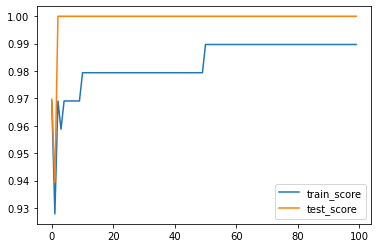

In [96]:
### 최적의 에포크 위치 확인하기 : 시각화
import matplotlib.pyplot as plt

plt.plot(train_score, label="train_score")
plt.plot(test_score, label="test_score")
plt.legend()
plt.show()

In [98]:
### 사용 클래스(모델) : SGDClassifier
from sklearn.linear_model import SGDClassifier

# 클래스(모델)생성
sc = SGDClassifier(loss="log", max_iter=60, random_state=42)

### 훈련모델 생성하기
sc.fit(train_scaled, train_target)

### 훈련모델 분류 정확도 확인하기
# - 과적합 여부 확인을 위해 훈련 및 테스트 데이터 모두확인
print("훈련 = ", sc.score(train_scaled, train_target))
print("테스트 = ", sc.score(test_scaled, test_target))

### (해석)
# - 훈련 /테스트 정확도 모두 1이 나옴

훈련 =  0.9690721649484536
테스트 =  1.0


In [99]:
### 독립변수 특성 데이터만 추출
predict_data = wine_data[['alcohol','color_intensity', 'proline']].to_numpy()

predict_scaled = ss.transform(predict_data)

# 예측 데이터 결과 확인하기
result_predict = sc.predict(predict_scaled)

wine_pred = wine_data[['alcohol','color_intensity','proline']]
wine_pred["target"] = wine_data["target"]
wine_pred["col_predict"] = result_predict
wine_pred

C:\Users\admin\AppData\Local\Temp\ipykernel_6024\559589157.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_pred["target"] = wine_data["target"]
C:\Users\admin\AppData\Local\Temp\ipykernel_6024\559589157.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_pred["col_predict"] = result_predict


,alcohol,color_intensity,proline,target,col_predict
0,14.23,5.64,1065.0,0,0
1,13.20,4.38,1050.0,0,0
2,13.16,5.68,1185.0,0,0
3,14.37,7.80,1480.0,0,0
4,13.24,4.32,735.0,0,0
...,...,...,...,...,...
125,12.07,2.76,378.0,1,1
126,12.43,3.94,352.0,1,1
127,11.79,3.00,466.0,1,1
128,12.37,2.12,342.0,1,1


In [100]:
### 정답 갯수와 오답 갯수 확인하기
o_cnt = len(wine_pred[(wine_pred["target"] == wine_pred["col_predict"])])
o_cnt

x_cnt = len(wine_pred[(wine_pred["target"] != wine_pred["col_predict"])])
x_cnt

sum_cnt = len(wine_pred)
sum_cnt 

print("총 갯수[{}]건 중에, 정답갯수[{}]건, 오답 갯수[{}]건".format(sum_cnt, o_cnt, x_cnt))

### 정답률과 오답률 확인하기
import numpy as np

o_p = np.round(o_cnt / sum_cnt * 100, 2)
x_p = np.round(x_cnt / sum_cnt * 100, 2)
sum_p = o_p + x_p

print("총 {}% 중 정답률[{}%], 오답률[{}%]".format(sum_p, o_p, x_p))

총 갯수[130]건 중에, 정답갯수[127]건, 오답 갯수[3]건
총 100.0% 중 정답률[97.69%], 오답률[2.31%]


## 4. 결정트리(Tree)

In [101]:
### 결정트리 패키지 불러들이기
from sklearn.tree import DecisionTreeClassifier

### 객체(모델)/클래스 생성하기
dt = DecisionTreeClassifier(random_state=42)

### 훈련모델 생성하기
dt.fit(train_scaled, train_target)

### 훈련모델 구분 정확도 확인하기
# - 과적합 여부 확인을 위해 훈련 및 테스트 데이터 모두 확인
print("훈련 =", dt.score(train_scaled, train_target))
print("테스트 = ",dt.score(test_scaled, test_target))

### (해석)
# - 과대적합.

훈련 = 1.0
테스트 =  0.9696969696969697


In [102]:
### 결정트리 패키지 불러들이기
from sklearn.tree import DecisionTreeClassifier

### 클래스 생성하기
dt = DecisionTreeClassifier(max_depth=3, random_state=42)

### 훈련모델 생성하기
dt.fit(train_scaled, train_target)

### 훈련모델 구분 정확도 확인하기
print("훈련 =", dt.score(train_scaled, train_target))
print("테스트 = ",dt.score(test_scaled, test_target))

훈련 = 1.0
테스트 =  0.9696969696969697


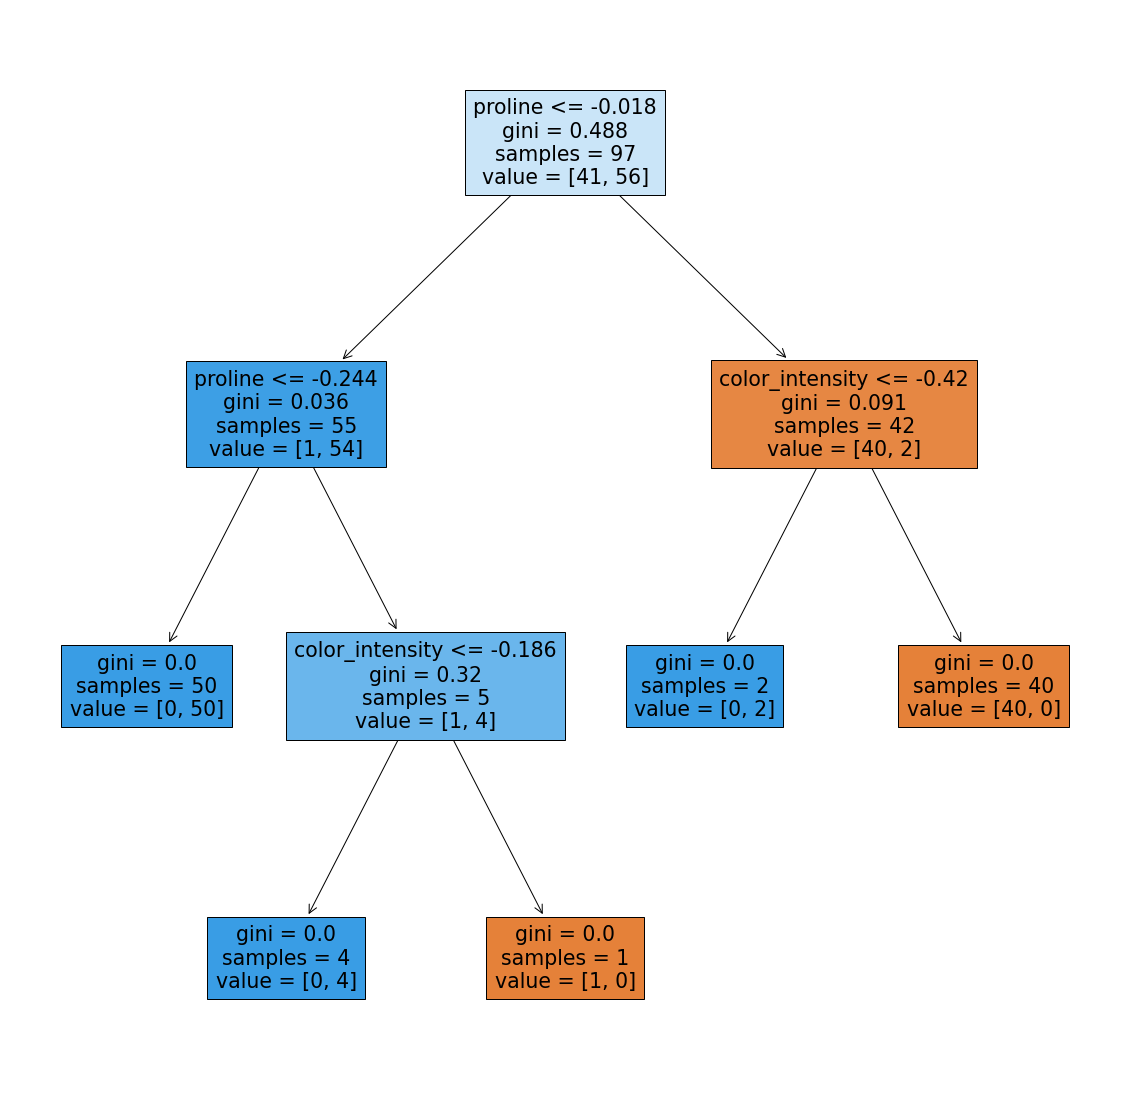

In [103]:
### 트리 시각화
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
plot_tree(dt, max_depth=3, filled=True,
            feature_names=['alcohol','color_intensity','proline'])

plt.show()


In [104]:
print(dt.feature_importances_)

[0.         0.11426912 0.88573088]


In [106]:
### 독립변수 특성 데이터만 추출
predict_data = wine_data[['alcohol','color_intensity', 'proline']].to_numpy()

predict_scaled = ss.transform(predict_data)

# 예측 데이터 결과 확인하기
result_predict = dt.predict(predict_scaled)

wine_pred = wine_data[['alcohol','color_intensity', 'proline']]

wine_pred["target"] = wine_data["target"]
wine_pred["col_predict"] = result_predict
wine_pred

C:\Users\admin\AppData\Local\Temp\ipykernel_6024\2896493072.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_pred["target"] = wine_data["target"]
C:\Users\admin\AppData\Local\Temp\ipykernel_6024\2896493072.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_pred["col_predict"] = result_predict


,alcohol,color_intensity,proline,target,col_predict
0,14.23,5.64,1065.0,0,0
1,13.20,4.38,1050.0,0,0
2,13.16,5.68,1185.0,0,0
3,14.37,7.80,1480.0,0,0
4,13.24,4.32,735.0,0,0
...,...,...,...,...,...
125,12.07,2.76,378.0,1,1
126,12.43,3.94,352.0,1,1
127,11.79,3.00,466.0,1,1
128,12.37,2.12,342.0,1,1


In [107]:
### 정답 갯수와 오답 갯수 확인하기
o_cnt = len(wine_pred[(wine_pred["target"] == wine_pred["col_predict"])])
o_cnt

x_cnt = len(wine_pred[(wine_pred["target"] != wine_pred["col_predict"])])
x_cnt

sum_cnt = len(wine_pred)
sum_cnt 

print("총 갯수[{}]건 중에, 정답갯수[{}]건, 오답 갯수[{}]건".format(sum_cnt, o_cnt, x_cnt))

### 정답률과 오답률 확인하기
import numpy as np

o_p = np.round(o_cnt / sum_cnt * 100, 2)
x_p = np.round(x_cnt / sum_cnt * 100, 2)
sum_p = o_p + x_p

print("총 {}% 중 정답률[{}%], 오답률[{}%]".format(sum_p, o_p, x_p))

총 갯수[130]건 중에, 정답갯수[129]건, 오답 갯수[1]건
총 100.0% 중 정답률[99.23%], 오답률[0.77%]


In [109]:
print(dt.feature_importances_)

[0.         0.11426912 0.88573088]


In [110]:
### wine[['color_intensity', 'proline']]

# 독립변수, 종속변수 데이터 추출하기
data = wine_data[['color_intensity', 'proline']].to_numpy()
# 훈련 타겟 데이터 추출
target = wine_data["target"].to_numpy()

# 훈련데이터, 테스트데이터 분리하기
train_input, test_input, train_target, test_target = \
    train_test_split(data, target, random_state=42)
    
# 스케일 정규화(표준화)

ss = StandardScaler()

ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [111]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print("훈련 =", dt.score(train_scaled, train_target))
print("테스트 = ", dt.score(test_scaled, test_target))

훈련 = 1.0
테스트 =  0.9696969696969697


In [112]:
### 독립변수 특성 데이터만 추출
predict_data = wine_data[['color_intensity', 'proline']].to_numpy()

predict_scaled = ss.transform(predict_data)

# 예측 데이터 결과 확인하기
result_predict = dt.predict(predict_scaled)

wine_pred = wine_data[['color_intensity', 'proline']]

wine_pred["target"] = wine_data["target"]
wine_pred["col_predict"] = result_predict
wine_pred

C:\Users\admin\AppData\Local\Temp\ipykernel_6024\366186249.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_pred["target"] = wine_data["target"]
C:\Users\admin\AppData\Local\Temp\ipykernel_6024\366186249.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_pred["col_predict"] = result_predict


,color_intensity,proline,target,col_predict
0,5.64,1065.0,0,0
1,4.38,1050.0,0,0
2,5.68,1185.0,0,0
3,7.80,1480.0,0,0
4,4.32,735.0,0,0
...,...,...,...,...
125,2.76,378.0,1,1
126,3.94,352.0,1,1
127,3.00,466.0,1,1
128,2.12,342.0,1,1


In [113]:
### 정답 갯수와 오답 갯수 확인하기
o_cnt = len(wine_pred[(wine_pred["target"] == wine_pred["col_predict"])])
o_cnt

x_cnt = len(wine_pred[(wine_pred["target"] != wine_pred["col_predict"])])
x_cnt

sum_cnt = len(wine_pred)
sum_cnt 

print("총 갯수[{}]건 중에, 정답갯수[{}]건, 오답 갯수[{}]건".format(sum_cnt, o_cnt, x_cnt))

### 정답률과 오답률 확인하기
import numpy as np

o_p = np.round(o_cnt / sum_cnt * 100, 2)
x_p = np.round(x_cnt / sum_cnt * 100, 2)
sum_p = o_p + x_p

print("총 {}% 중 정답률[{}%], 오답률[{}%]".format(sum_p, o_p, x_p))

총 갯수[130]건 중에, 정답갯수[129]건, 오답 갯수[1]건
총 100.0% 중 정답률[99.23%], 오답률[0.77%]


In [61]:
##### (해설)
# 4가지 분류모델을 사용한 결과
# 가장 적합한 모델은 4. 결정트리 모델로
# 정확도는
# 훈련 = 1.0
# 테스트 =  0.9696969696969697
# 훈련 정확도가 1이 나왔지만, 정답갯수와 오답갯수를 확인한 결과 
# 총 갯수[130]건 중에, 정답갯수[129]건, 오답 갯수[1]건
# 총 100.0% 중 정답률[99.23%], 오답률[0.77%]
# 따라서 모든 13가지의 모든 독립변수를 활용한 결과 결정트리 모델을 사용하는 것이 가장 적합하다고 판단.